**DESIGN OF AI POWERED PREDICTIVE SYSTEM**

In this project, i developed and deployed a machine learning model for a real-world  application on sales data. I investigated my data using EDA analysis  and also preprocessed my data using standard scaler, then after several model trials i trained and tested my data using ensembled models i.e; two models and evaluated the model using the respective evaluatio metrics (R-squared error, MSE, MAE e.t.c), and deploy the solution using Flask so that it can be accessed via a simple web interface.

**Sales Data Prediction**
Sales Data Prediction is a trained and tested machine learning model that involves the prediction of future sales and quantity with and without discounts.

**Problem Statement**
Most time business owners worry about if they need to add discount to their sales or not and for how long should this discount be and where it is needed. This project is used to predict sales and quantity of products that will sold in future dates if discount were added or not.

***DATA SET CHOICE**

My data set was chosen from Kaggle.com, you can search here 
# https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data?resource=download

**AIM**
The Aim of this project is to predict futures sales ans quantities of products using the combination of XGBRegressor model and RandomForest Regressor model through ensemble method.

**Objectives**
The objectives include
i. Preparation and Cleaning of Dataset using the pandas library and needed functions as the data requires.
ii. Exploratory Data Analysis of Data usint mathplotlib.
iii. Preprocessing of data using standard scaler.
iv. Training and Testing of data using chosen machine learning model.
v. Model Evaluation, visualisation and Deployment.

Kindly follow me :)==>



IMPORTATION OF DATA SET

In [3]:
import pandas as pd
import numpy as np
import joblib


data= pd.read_csv('Supplement_Sales_Weekly_Expanded Edit.csv')


data.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Drugs,Sale Price,Sold Price,After Unit Returned
0,1/6/2020,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,WHEY PROTEIN,4573.14,4435.9458,4373.9046
1,1/6/2020,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,VITAMIN C,5908.89,5672.5344,5672.5344
2,1/6/2020,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,FISH OIL,2078.51,1558.8825,1558.8825
3,1/6/2020,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,MULTIVITAMIN,2249.80,2069.8160,2069.8160
4,1/6/2020,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,PRE-WORKOUT,5568.79,4176.5925,4096.7850


DATASET DESCRIPTION AND INFORMATION

In [5]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 4384 non-null   object 
 1   Product Name         4384 non-null   object 
 2   Category             4384 non-null   object 
 3   Units Sold           4384 non-null   int64  
 4   Price                4384 non-null   float64
 5   Revenue              4384 non-null   float64
 6   Discount             4384 non-null   float64
 7   Units Returned       4384 non-null   int64  
 8   Location             4384 non-null   object 
 9   Platform             4384 non-null   object 
 10  Drugs                4384 non-null   object 
 11  Sale Price           4384 non-null   float64
 12  Sold Price           4384 non-null   float64
 13  After Unit Returned  4384 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 479.6+ KB


DATA CLEANING: 

It was noticed that Product Name and Drugs had the same vale therefore, column drugs was dropped.
Also, the revenue and sales price had the same value so sales price was dropped also

DATA RE-ARRANGEMENT

Also the data was re-arranged for better understanding and hierachy.

In [7]:
# replacing productname with drugs due to same values

# data.replace({'Product Name' : {''})
data['Product Name'] = data['Product Name'].str.upper()

data.drop('Drugs', axis=1, inplace=True)
data.drop('Sale Price', axis=1, inplace=True)

data.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Sold Price,After Unit Returned
0,1/6/2020,WHEY PROTEIN,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,4435.9458,4373.9046
1,1/6/2020,VITAMIN C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,5672.5344,5672.5344
2,1/6/2020,FISH OIL,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,1558.8825,1558.8825
3,1/6/2020,MULTIVITAMIN,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,2069.8160,2069.8160
4,1/6/2020,PRE-WORKOUT,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,4176.5925,4096.7850


In [7]:
# Rearrange columnns using indexing
data=data.reindex(columns=['Date','Product Name','Category','Platform','Location','Price','Units Sold','Revenue','Discount','Units Returned','Sold Price','After Unit Returned'])


data.head()

,Date,Product Name,Category,Platform,Location,Price,Units Sold,Revenue,Discount,Units Returned,Sold Price,After Unit Returned
0,1/6/2020,Whey Protein,Protein,Walmart,Canada,31.98,143,4573.14,0.03,2,4435.9458,4373.9046
1,1/6/2020,Vitamin C,Vitamin,Amazon,UK,42.51,139,5908.89,0.04,0,5672.5344,5672.5344
2,1/6/2020,Fish Oil,Omega,Amazon,Canada,12.91,161,2078.51,0.25,0,1558.8825,1558.8825
3,1/6/2020,Multivitamin,Vitamin,Walmart,Canada,16.07,140,2249.80,0.08,0,2069.8160,2069.8160
4,1/6/2020,Pre-Workout,Performance,iHerb,Canada,35.47,157,5568.79,0.25,3,4176.5925,4096.7850


In [9]:
# EXPLORATORY DATA ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sb

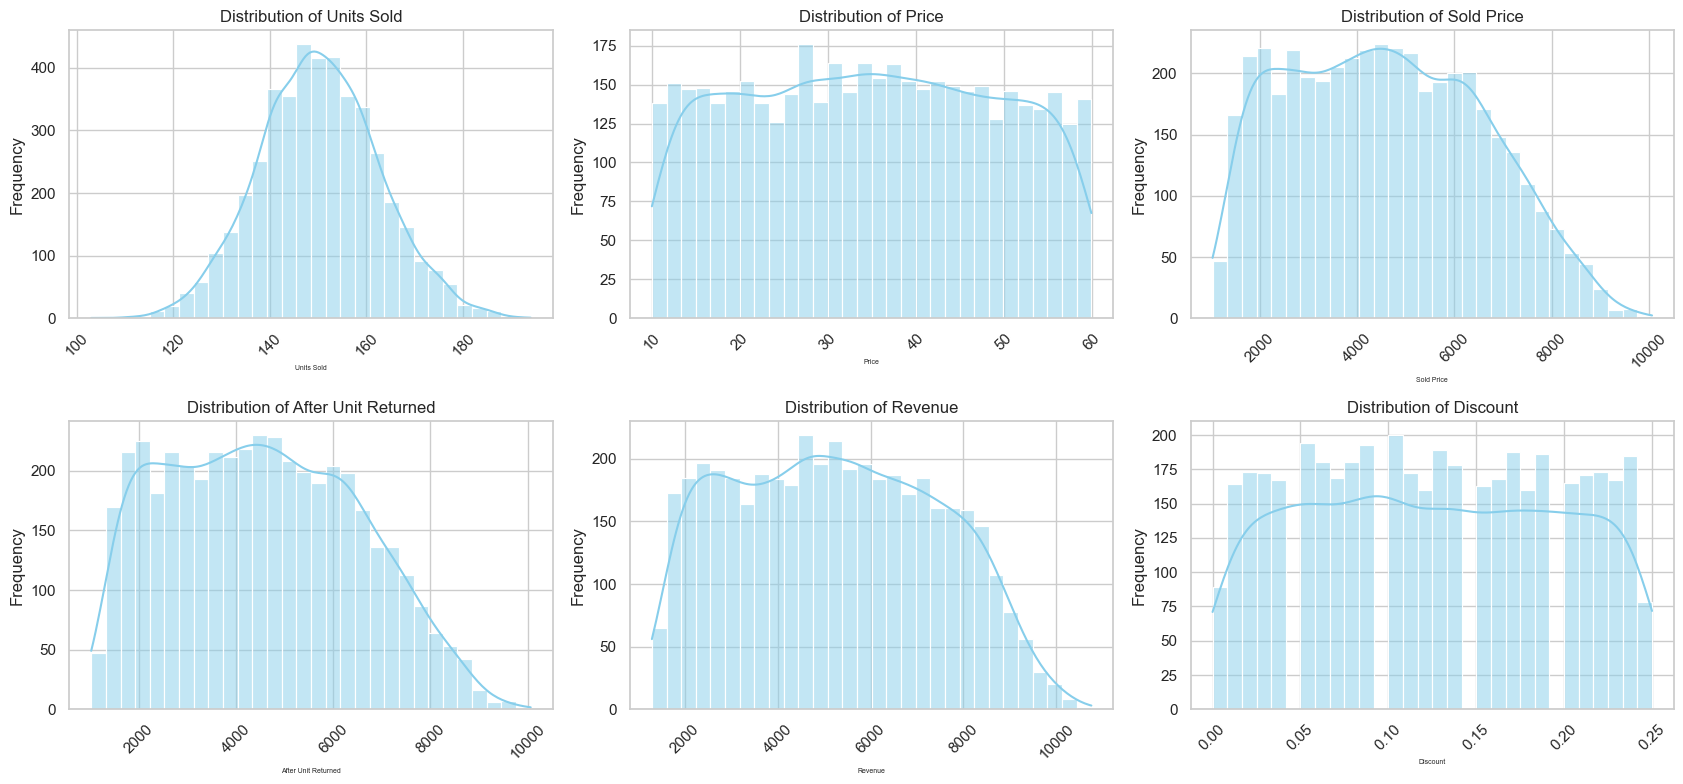

In [10]:

# for Units_Sold

sb.set(style="whitegrid")

# Columns to plot
features=['Units Sold','Price','Sold Price','After Unit Returned','Revenue','Discount']

#plot Histograms

plt.figure(figsize=(17,8))

for i, features in enumerate(features):
    plt.subplot(2,3, i+1)
    sb.histplot(data[features],kde=True,bins=30,color='skyblue')
    plt.title(f'Distribution of {features}')
    plt.xlabel(features, fontsize=5)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\229446172.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=xdata, data=data, palette='Set2')


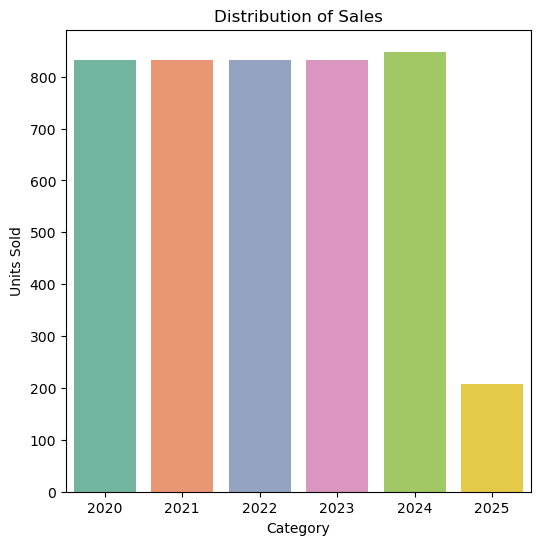

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\229446172.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=x2data, data=data, palette='Set2' )


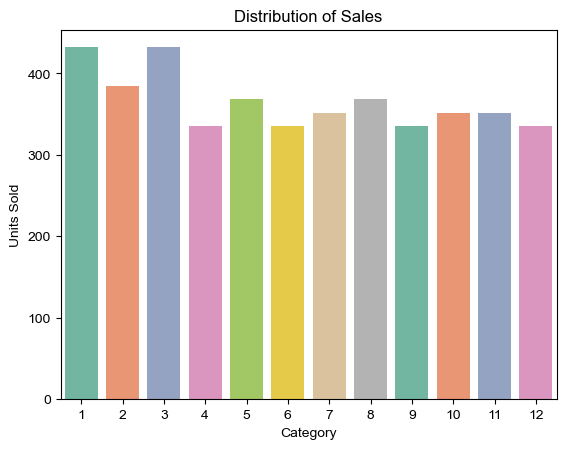

In [13]:
#For date

date_object = pd.to_datetime(data['Date'])

xdata=date_object.dt.year

plt.figure(figsize=(6,6))

# plt.subplot(2,3,3)
sb.countplot(x=xdata, data=data, palette='Set2')
plt.title('Distribution of Sales')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

x2data=date_object.dt.month

sb.countplot(x=x2data, data=data, palette='Set2' )
plt.title('Distribution of Sales')
plt.xlabel('Category')
plt.ylabel('Units Sold')

sb.set(style="whitegrid")

plt.tight_layout
plt.show()

Categorical Features Visualization

*Category *Product Name *Location *Drugs *Platform

C:\Users\HP\AppData\Local\Temp\ipykernel_8216\3711273595.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=data[features], data=data, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_8216\3711273595.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=data[features], data=data, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_8216\3711273595.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=data[features], data=data, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_8216\3711273595.py:16: FutureWar

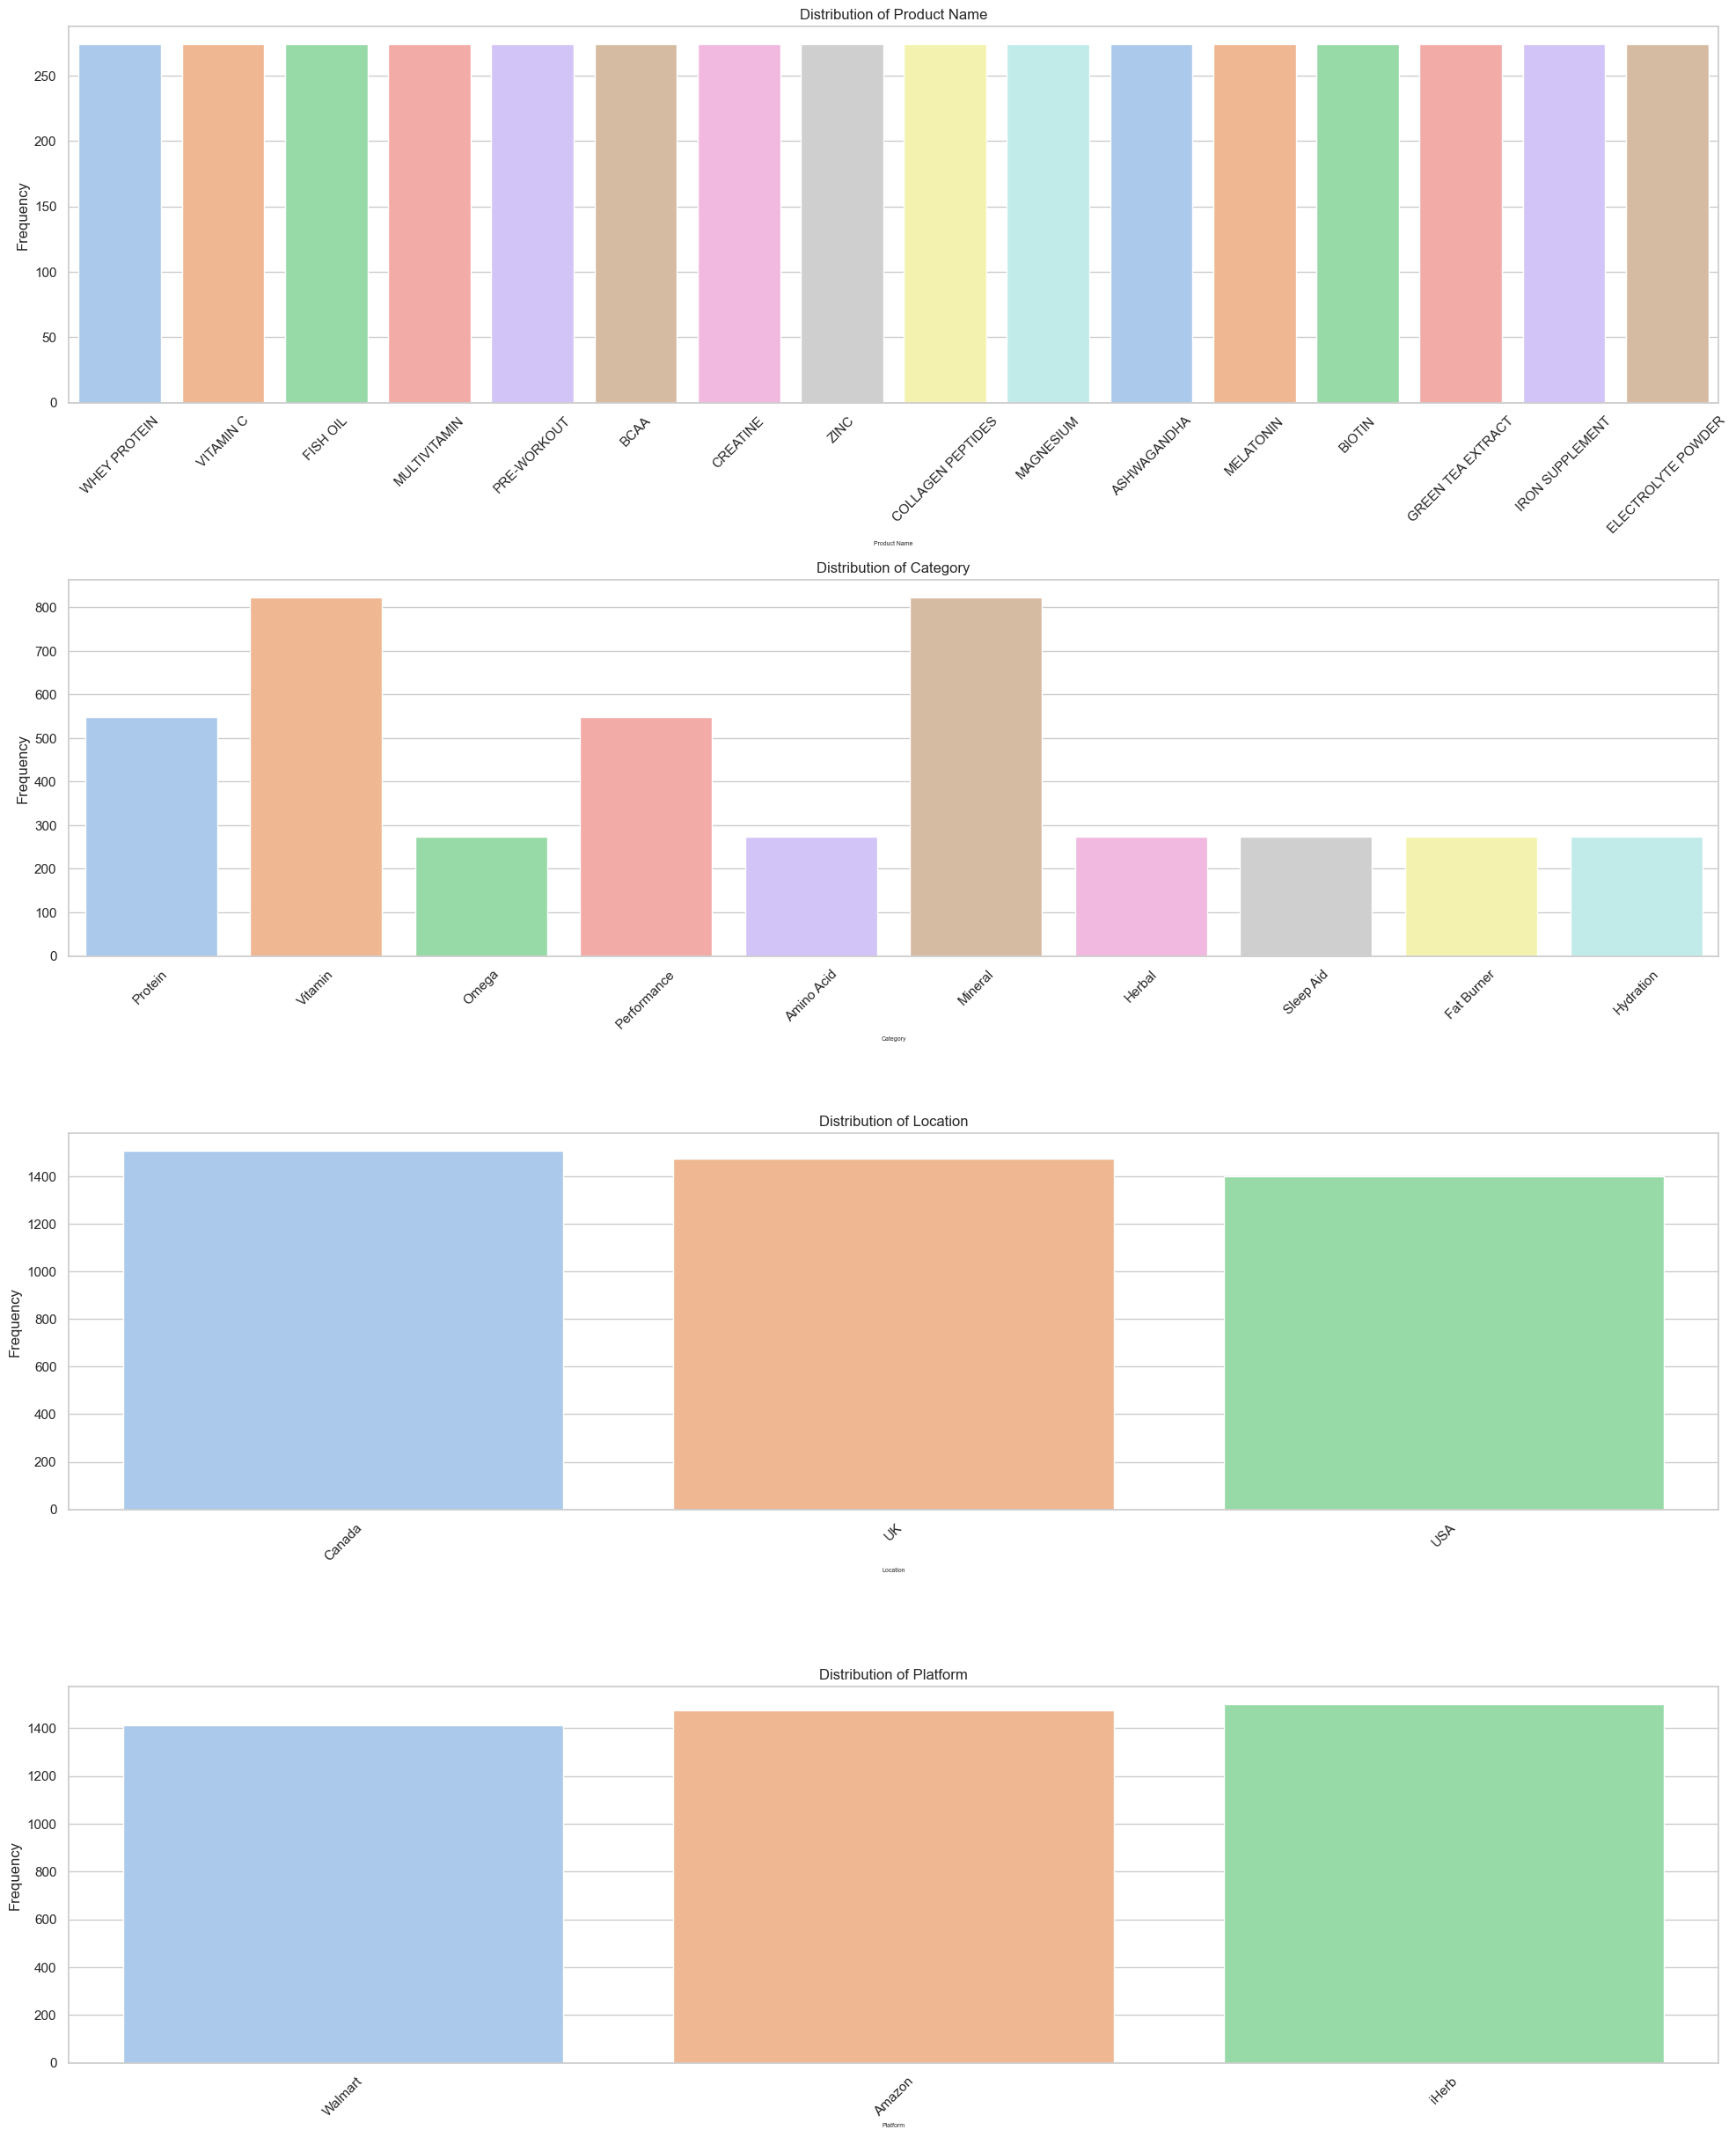

In [13]:
#for Category

# Categorical features

sb.set(style="whitegrid")

# Columns to plot
features=['Product Name', 'Category', 'Location', 'Platform']

#plot Histograms

plt.figure(figsize=(20,30))

for i, features in enumerate(features):
    plt.subplot(5,1, i+1)
    sb.countplot(x=data[features], data=data, palette='pastel')
    plt.title(f'Distribution of {features}')
    plt.xlabel(features, fontsize=5)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From the exploratory analysis we can see the sales trends and countries doing well or not and also the categories and years with higher sales

LOCATING OF UNIQUE STRINGS AND PRINTING THE VALUES INVOLVED FOR THE STRINGED COLUMNS BEFORE ENCODING

Getting my uniques string elements value before encoding them

In [15]:
# Checking count of unique values of string to be able to encode at the front end
unique_counts=data.nunique()
print(unique_counts)

#To get the the columns in array for frontend usage

distinct_columns = data.columns.unique()
print("Distinct column names:", list(distinct_columns))
stringed_columns=['Product Name','Category','Platform','Location']

for col in stringed_columns:
    if col in data.columns:
        print(f"Column: {col}")
        print("Distinct values:", data[col].unique())
        print("-" * 30)

Date                    274
Product Name             16
Category                 10
Platform                  3
Location                  3
Price                  2919
Units Sold               81
Revenue                4326
Discount                 26
Units Returned            9
Sold Price             4375
After Unit Returned    4375
dtype: int64
Distinct column names: ['Date', 'Product Name', 'Category', 'Platform', 'Location', 'Price', 'Units Sold', 'Revenue', 'Discount', 'Units Returned', 'Sold Price', 'After Unit Returned']
Column: Product Name
Distinct values: ['WHEY PROTEIN' 'VITAMIN C' 'FISH OIL' 'MULTIVITAMIN' 'PRE-WORKOUT' 'BCAA'
 'CREATINE' 'ZINC' 'COLLAGEN PEPTIDES' 'MAGNESIUM' 'ASHWAGANDHA'
 'MELATONIN' 'BIOTIN' 'GREEN TEA EXTRACT' 'IRON SUPPLEMENT'
 'ELECTROLYTE POWDER']
------------------------------
Column: Category
Distinct values: ['Protein' 'Vitamin' 'Omega' 'Performance' 'Amino Acid' 'Mineral' 'Herbal'
 'Sleep Aid' 'Fat Burner' 'Hydration']
--------------------------

CONVERSION OF DATE AND ENCODING PROCESS USING LABEL ENCODER FOR EASY MACHINE LEARNING PROCESS

In [11]:

# Conversion of date and encoding the strings

data['Date'] = pd.to_datetime(data['Date'],format='%m/%d/%Y').astype('int64')// 10**9  # or use .view('int64') in older pandas

# Encoding

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder=LabelEncoder()

data['Product Name']=encoder.fit_transform(data['Product Name'])
data['Category']=encoder.fit_transform(data['Category'])
data['Location']=encoder.fit_transform(data['Location'])
data['Platform']=encoder.fit_transform(data['Platform'])


data.head()



,Date,Product Name,Category,Platform,Location,Price,Units Sold,Revenue,Discount,Units Returned,Sold Price,After Unit Returned
0,1578268800,14,7,1,0,31.98,143,4573.14,0.03,2,4435.9458,4373.9046
1,1578268800,13,9,0,1,42.51,139,5908.89,0.04,0,5672.5344,5672.5344
2,1578268800,6,5,0,0,12.91,161,2078.51,0.25,0,1558.8825,1558.8825
3,1578268800,11,9,1,0,16.07,140,2249.80,0.08,0,2069.8160,2069.8160
4,1578268800,12,6,2,0,35.47,157,5568.79,0.25,3,4176.5925,4096.7850


**TARGET AND FEATURES SELECTION AND DATA PREPROCESSING**

HERE, Revenue is selected first and also the data is preprocessed for better training of data.

Then, the Train-test split is also carried out

In [15]:
# Target Selection and Features

target_variable=data['Revenue']

# Standardized data perform better

from sklearn.preprocessing import StandardScaler as sts
from sklearn.preprocessing import MinMaxScaler

x = data.drop(columns=['Revenue','Units Sold','Units Returned','After Unit Returned','Discount','Sold Price'], axis=1)
y = target_variable

# scaler = sts()
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)


In [17]:
#Train_Test Split


from sklearn.model_selection import train_test_split
# , stratify=y
# Split the scaled data into 80% training and 20% testing

try:
    X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42)
    print("Stratified split successful!")
except ValueError as e:
    print(f"Error during stratified split: {e}")

Stratified split successful!


In [19]:
# Confirm split size

print("Training Set Shape", X_train.shape, X_test.shape)
print("Training Set Shape", X_test.shape, y_test.shape)

Training Set Shape (3507, 6) (877, 6)
Training Set Shape (877, 6) (877,)


**MODEL DEVELOPMENT**

Several models are tested namely:
Linear Regression model
XGBRegressor model
RandomForest Regressor Model.
Some of this models were tested individually and also combined to chose the best model for this data category 


In [23]:
# Model Implementation

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, accuracy_score
import numpy as np


# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print results
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Model Evaluation

r2_train = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_test,y_pred)
rmse_train = np.sqrt(mse_train)

#Print Evaluation

print('R squared value = ', r2_train)
print('MSE value = ', mse_train)
print('MAE value = ', mae_train)
print('RMSe value = ', rmse_train)

#Prediction Test

while True:
    user_input = input("Enter a test row number to predict (or 'q' to quit): ")
    
    if user_input.lower() == 'q':
        print("Exiting...")
        break
    
    if not user_input.isdigit():
        print("Please enter a valid integer row number or 'q' to quit.")
        continue
    
    row_index = int(user_input)
    
    if row_index < 0 or row_index >= len(X_test):
        print(f"Please enter a number between 0 and {len(X_test) - 1}")
        continue
    
    sample = X_test[row_index].reshape(1, -1)
    predicted_label = model.predict(sample)[0]
    actual_label = y_test.iloc[row_index]
    
    
    print(f"Row {row_index} prediction: {predicted_label}, {actual_label} ")

data.head()


Intercept: 1455.7113360897897
Coefficient: 12.278509477143935
Mean Squared Error (MSE): 217864.52327506003
R² Score: 0.9528359175076393
R squared value =  0.9528359175076393
MSE value =  217864.52327506003
MAE value =  345.32362402229194
RMSe value =  466.7595990175885


Enter a test row number to predict (or 'q' to quit):  2


Row 2 prediction: 8481.888522836223, 7487.9 


Enter a test row number to predict (or 'q' to quit):  q


Exiting...


,Date,Product Name,Category,Platform,Location,Price,Units Sold,Revenue,Discount,Units Returned,Sold Price,After Unit Returned
0,1578268800,14,7,1,0,31.98,143,4573.14,0.03,2,4435.9458,4373.9046
1,1578268800,13,9,0,1,42.51,139,5908.89,0.04,0,5672.5344,5672.5344
2,1578268800,6,5,0,0,12.91,161,2078.51,0.25,0,1558.8825,1558.8825
3,1578268800,11,9,1,0,16.07,140,2249.80,0.08,0,2069.8160,2069.8160
4,1578268800,12,6,2,0,35.47,157,5568.79,0.25,3,4176.5925,4096.7850


In [48]:
# Using xgb regressor
from sklearn.datasets import make_regression
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, accuracy_score
import numpy as np


model2=XGBRegressor()
model2.fit(X_train, y_train)

# Predict on test data
y_pred = model2.predict(X_test)

# Print results
print("Intercept:", model2.intercept_)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Model Evaluation

r2_train = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_test,y_pred)
rmse_train = np.sqrt(mse_train)

#Print Evaluation

print('R squared value = ', r2_train)
print('MSE value = ', mse_train)
print('MAE value = ', mae_train)
print('RMSe value = ', rmse_train)

# Show predictions and actual values
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(results)

# Prediction Test

while True:
    user_input = input("Enter a test row number to predict (or 'q' to quit): ")
    
    if user_input.lower() == 'q':
        print("Exiting...")
        break
    
    if not user_input.isdigit():
        print("Please enter a valid integer row number or 'q' to quit.")
        continue
    
    row_index = int(user_input)
    
    if row_index < 0 or row_index >= len(X_test):
        print(f"Please enter a number between 0 and {len(X_test) - 1}")
        continue
    
    sample = X_test[row_index].reshape(1, -1)
    predicted_label = model2.predict(sample)[0]
    actual_label = y_test.iloc[row_index]
    
    
    print(f"Row {row_index} prediction: {predicted_label}, {actual_label} ")

data.head()


Intercept: [5251.735]
Mean Squared Error (MSE): 282387.0446457008
R² Score: 0.9388678538927205
R squared value =  0.9388678538927205
MSE value =  282387.0446457008
MAE value =  395.6350374256164
RMSe value =  531.4010205538758
      Actual    Predicted
0    5748.96  8081.520508
1    7866.00  7682.856934
2    7487.90  7968.296387
3    8688.32  7867.680176
4    4990.55  4866.497070
..       ...          ...
872  4432.60  4700.372070
873  2639.78  2782.939697
874  6148.53  5832.729492
875  5378.88  5279.682129
876  1843.20  2131.807617

[877 rows x 2 columns]


Enter a test row number to predict (or 'q' to quit):  2


Row 2 prediction: 7968.29638671875, 7487.9 


Enter a test row number to predict (or 'q' to quit):  q


Exiting...


,Date,Product Name,Category,Platform,Location,Price,Units Sold,Revenue,Discount,Units Returned,Sold Price,After Unit Returned
0,1578268800,14,7,1,0,31.98,143,4573.14,0.03,2,4435.9458,4373.9046
1,1578268800,13,9,0,1,42.51,139,5908.89,0.04,0,5672.5344,5672.5344
2,1578268800,6,5,0,0,12.91,161,2078.51,0.25,0,1558.8825,1558.8825
3,1578268800,11,9,1,0,16.07,140,2249.80,0.08,0,2069.8160,2069.8160
4,1578268800,12,6,2,0,35.47,157,5568.79,0.25,3,4176.5925,4096.7850


In [27]:
#Using both XGBregressor and linear regression

from sklearn.datasets import make_regression
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


# Define base models
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lr = LinearRegression()

# Stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr)
    ],
    final_estimator=LinearRegression(),  # meta-model
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Predict
y_pred = stacked_model.predict(X_test)

# Model Evaluation

r2_train = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_test,y_pred)
rmse_train = np.sqrt(mse_train)

#Print Evaluation

print('R squared value = ', r2_train)
print('MSE value = ', mse_train)
print('MAE value = ', mae_train)
print('RMSe value = ', rmse_train)

#Prediction Test

row_index = 2  # or 1, 2, etc.

# For NumPy array features:
sample = X_test[row_index].reshape(1, -1)

# Predict label and probability
predicted_label = stacked_model.predict(sample)[0]

# For pandas Series labels, use iloc to get by position
actual_label = y_test.iloc[row_index]

print(f"Row {row_index} prediction: {predicted_label} ")
print(f"Actual label: {actual_label}")

#Exporting model after predictionTest
joblib.dump(stacked_model, "sales_Revenue_without discount_prediction_model.pkl")
      

data.head()


R squared value =  0.9528026537576383
MSE value =  218018.1781465925
MAE value =  345.3991160610496
RMSe value =  466.92416744755513
Row 2 prediction: 8461.972439387022 
Actual label: 7487.9


,Date,Product Name,Category,Platform,Location,Price,Units Sold,Revenue,Discount,Units Returned,Sold Price,After Unit Returned
0,1578268800,14,7,1,0,31.98,143,4573.14,0.03,2,4435.9458,4373.9046
1,1578268800,13,9,0,1,42.51,139,5908.89,0.04,0,5672.5344,5672.5344
2,1578268800,6,5,0,0,12.91,161,2078.51,0.25,0,1558.8825,1558.8825
3,1578268800,11,9,1,0,16.07,140,2249.80,0.08,0,2069.8160,2069.8160
4,1578268800,12,6,2,0,35.47,157,5568.79,0.25,3,4176.5925,4096.7850


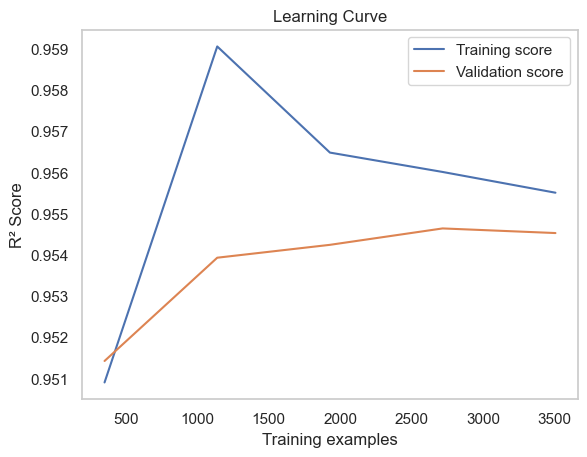

In [52]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    stacked_model, x, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()

In [28]:
#Using both RandomForestRegressor and linear regression

from sklearn.datasets import make_regression
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


# Define base models
rdm = RandomForestRegressor(n_estimators=500, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lr = LinearRegression()

# Stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('rdm', rdm),
        ('lr', lr)
    ],
    final_estimator=LinearRegression(),  # meta-model
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Predict
y_pred = stacked_model.predict(X_test)

# Model Evaluation

r2_train = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_test,y_pred)
rmse_train = np.sqrt(mse_train)

#Print Evaluation

print('R squared value = ', r2_train)
print('MSE value = ', mse_train)
print('MAE value = ', mae_train)
print('RMSe value = ', rmse_train)

#Prediction Test

#Prediction Test

row_index = 2  # or 1, 2, etc.

# For NumPy array features:
sample = X_test[row_index].reshape(1, -1)

# Predict label and probability
predicted_label = stacked_model.predict(sample)[0]

# For pandas Series labels, use iloc to get by position
actual_label = y_test.iloc[row_index]

print(f"Row {row_index} prediction: {predicted_label} ")
print(f"Actual label: {actual_label}")


data.head()


R squared value =  0.9528828579346553
MSE value =  217647.6918810468
MAE value =  345.5279134341693
RMSe value =  466.5272681002117
Row 2 prediction: 8464.945565284084 
Actual label: 7487.9


,Date,Product Name,Category,Platform,Location,Price,Units Sold,Revenue,Discount,Units Returned,Sold Price,After Unit Returned
0,1578268800,14,7,1,0,31.98,143,4573.14,0.03,2,4435.9458,4373.9046
1,1578268800,13,9,0,1,42.51,139,5908.89,0.04,0,5672.5344,5672.5344
2,1578268800,6,5,0,0,12.91,161,2078.51,0.25,0,1558.8825,1558.8825
3,1578268800,11,9,1,0,16.07,140,2249.80,0.08,0,2069.8160,2069.8160
4,1578268800,12,6,2,0,35.47,157,5568.79,0.25,3,4176.5925,4096.7850


In [29]:
#### Using both RandomForestRegressor and XGB Regressor

from sklearn.datasets import make_regression
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


# Define base models
rdm = RandomForestRegressor(n_estimators=500, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lr = LinearRegression()

# Stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('rdm', rdm),
        ('xgb', xgb)
    ],
    final_estimator=xgb,  # meta-model
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Predict
y_pred = stacked_model.predict(X_test)

# Model Evaluation

r2_train = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_test,y_pred)
rmse_train = np.sqrt(mse_train)

#Print Evaluation

print('R squared value = ', r2_train)
print('MSE value = ', mse_train)
print('MAE value = ', mae_train)
print('RMSe value = ', rmse_train)

#Prediction Test

row_index = 2  # or 1, 2, etc.

# For NumPy array features:
sample = X_test[row_index].reshape(1, -1)

# Predict label and probability
predicted_label = stacked_model.predict(sample)[0]

# For pandas Series labels, use iloc to get by position
actual_label = y_test.iloc[row_index]

print(f"Row {row_index} prediction: {predicted_label} ")
print(f"Actual label: {actual_label}")


data.head()


R squared value =  0.9442482467684576
MSE value =  257533.45549563365
MAE value =  376.5348300814656
RMSe value =  507.477541863316
Row 2 prediction: 8506.5859375 
Actual label: 7487.9


,Date,Product Name,Category,Platform,Location,Price,Units Sold,Revenue,Discount,Units Returned,Sold Price,After Unit Returned
0,1578268800,14,7,1,0,31.98,143,4573.14,0.03,2,4435.9458,4373.9046
1,1578268800,13,9,0,1,42.51,139,5908.89,0.04,0,5672.5344,5672.5344
2,1578268800,6,5,0,0,12.91,161,2078.51,0.25,0,1558.8825,1558.8825
3,1578268800,11,9,1,0,16.07,140,2249.80,0.08,0,2069.8160,2069.8160
4,1578268800,12,6,2,0,35.47,157,5568.79,0.25,3,4176.5925,4096.7850


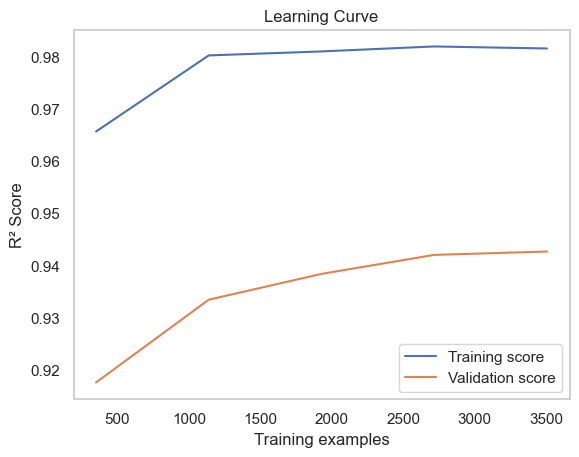

In [30]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    stacked_model, x, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()

**MODEL EVALUATION CONCLUSION**

The XGB Regressor and the combination of XGB regressor, RandomForest Regressor and Linear regression give the same predictions While the Singular use of Linear regression gives a more wide difference in prediction compared to other models. Hence one of the ensemble models would be used.

**Model Deployment**

In each cell for the chosen model each model was deployed using dump into pickle files.


**PREDICTION TEST using combination of Randomforest Regressor and XGB Regressor**

    Model Prediction for quantity with and without discount and visualisation of prediction compared to training.
    Model Prediction for revenue with and without discount and visualisation of prediction compared to training.

In [33]:
# Prediction of quantity using one of the ensemble models with and without discount

In [29]:
#### Using both Linear Regression and XGB Regressor

from sklearn.datasets import make_regression
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler as sts
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Target Selection and Features

target_variable=data['Units Sold']

# Standardized data perform better

x = data.drop(columns=['Revenue','Units Sold','Units Returned','After Unit Returned','Discount','Sold Price'], axis=1)
y = target_variable

# scaler = sts()
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

#Train_Test Split

try:
    X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42)
    print("Stratified split successful!")
except ValueError as e:
    print(f"Error during stratified split: {e}")


# Define base models
rdm = RandomForestRegressor(n_estimators=500, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lr = LinearRegression()

# Stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('lr', rdm),
        ('xgb', xgb)
    ],
    final_estimator=lr,  # meta-model
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Predict
y_pred = stacked_model.predict(X_test)

# Model Evaluation

r2_train = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_test,y_pred)
rmse_train = np.sqrt(mse_train)

#Print Evaluation

print('R squared value = ', r2_train)
print('MSE value = ', mse_train)
print('MAE value = ', mae_train)
print('RMSe value = ', rmse_train)

#Prediction Test
row_index = 25  # or 1, 2, etc.

# For NumPy array features:
sample = X_test[row_index].reshape(1, -1)

# Predict label and probability
predicted_label = stacked_model.predict(sample)[0]

# For pandas Series labels, use iloc to get by position
actual_label = y_test.iloc[row_index]

print(f"Row {row_index} prediction: {predicted_label} ")
print(f"Actual label: {actual_label}")

#Exporting model after predictionTest
joblib.dump(stacked_model, "sales_Quantity_without discount_prediction_model.pkl")

data.head()


Stratified split successful!
R squared value =  -0.004579565112608597
MSE value =  159.72064715768386
MAE value =  10.079109515334709
RMSe value =  12.638063425924237
Row 25 prediction: 150.7320027895199 
Actual label: 156


,Date,Product Name,Category,Platform,Location,Price,Units Sold,Revenue,Discount,Units Returned,Sold Price,After Unit Returned
0,1578268800,14,7,1,0,31.98,143,4573.14,0.03,2,4435.9458,4373.9046
1,1578268800,13,9,0,1,42.51,139,5908.89,0.04,0,5672.5344,5672.5344
2,1578268800,6,5,0,0,12.91,161,2078.51,0.25,0,1558.8825,1558.8825
3,1578268800,11,9,1,0,16.07,140,2249.80,0.08,0,2069.8160,2069.8160
4,1578268800,12,6,2,0,35.47,157,5568.79,0.25,3,4176.5925,4096.7850


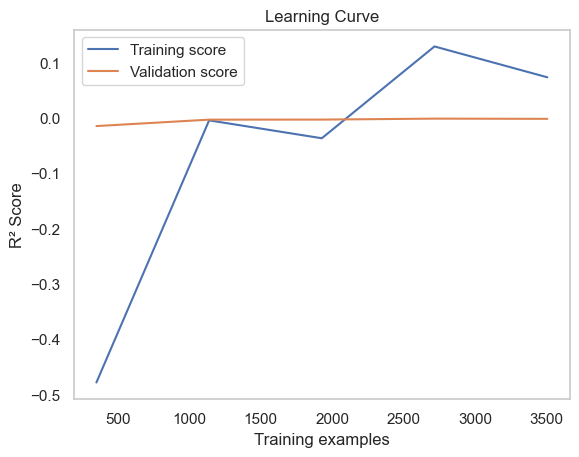

In [31]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    stacked_model, x, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()

In [35]:
#Prediction of quantity with discount

In [31]:
#### Using both Linear Regression and XGB Regressor

from sklearn.datasets import make_regression
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler as sts
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Target Selection and Features

target_variable=data['Units Sold']

# Standardized data perform better

x = data.drop(columns=['Revenue','Units Sold','Units Returned','After Unit Returned','Sold Price'], axis=1)
y = target_variable

# scaler = sts()
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

#Train_Test Split

try:
    X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42)
    print("Stratified split successful!")
except ValueError as e:
    print(f"Error during stratified split: {e}")


# Define base models
rdm = RandomForestRegressor(n_estimators=500, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lr = LinearRegression()

# Stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('lr', rdm),
        ('xgb', xgb)
    ],
    final_estimator=lr,  # meta-model
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Predict
y_pred = stacked_model.predict(X_test)

# Model Evaluation

r2_train = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_test,y_pred)
rmse_train = np.sqrt(mse_train)

#Print Evaluation

print('R squared value = ', r2_train)
print('MSE value = ', mse_train)
print('MAE value = ', mae_train)
print('RMSe value = ', rmse_train)

#Prediction Test

row_index = 2  # or 1, 2, etc.

# For NumPy array features:
sample = X_test[row_index].reshape(1, -1)

# Predict label and probability
predicted_label = stacked_model.predict(sample)[0]

# For pandas Series labels, use iloc to get by position
actual_label = y_test.iloc[row_index]

print(f"Row {row_index} prediction: {predicted_label} ")
print(f"Actual label: {actual_label}")

#Exporting model after predictionTest
joblib.dump(stacked_model, "sales_Quantity_with discount_prediction_model.pkl")

data.head()


Stratified split successful!
R squared value =  -0.005529011892630997
MSE value =  159.8716021038259
MAE value =  10.088092611711593
RMSe value =  12.644034249551284
Row 2 prediction: 150.739343443714 
Actual label: 133


,Date,Product Name,Category,Platform,Location,Price,Units Sold,Revenue,Discount,Units Returned,Sold Price,After Unit Returned
0,1578268800,14,7,1,0,31.98,143,4573.14,0.03,2,4435.9458,4373.9046
1,1578268800,13,9,0,1,42.51,139,5908.89,0.04,0,5672.5344,5672.5344
2,1578268800,6,5,0,0,12.91,161,2078.51,0.25,0,1558.8825,1558.8825
3,1578268800,11,9,1,0,16.07,140,2249.80,0.08,0,2069.8160,2069.8160
4,1578268800,12,6,2,0,35.47,157,5568.79,0.25,3,4176.5925,4096.7850


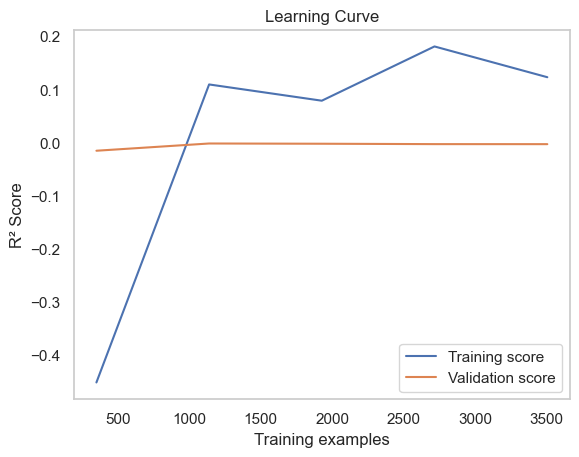

In [37]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    stacked_model, x, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Prediction for Revenue with discount, without discount has been done previously @ line 199

In [33]:

#### Using both Linear Regression and XGB Regressor

from sklearn.datasets import make_regression
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
# Target Selection and Features

target_variable=data['Revenue']

# Standardized data perform better

x = data.drop(columns=['Revenue','Units Sold','Units Returned','After Unit Returned','Sold Price'], axis=1)
y = target_variable

# scaler = sts()
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

#Train_Test Split

try:
    X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42)
    print("Stratified split successful!")
except ValueError as e:
    print(f"Error during stratified split: {e}")



 
# Define base models
rdm = RandomForestRegressor(n_estimators=500, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lr = LinearRegression()

# Stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('lr', rdm),
        ('xgb', xgb)
    ],
    final_estimator=lr,  # meta-model
    cv=5
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Predict
y_pred = stacked_model.predict(X_test)

# Model Evaluation

r2_train = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_test,y_pred)
rmse_train = np.sqrt(mse_train)

#Print Evaluation

print('R squared value = ', r2_train)
print('MSE value = ', mse_train)
print('MAE value = ', mae_train)
print('RMSe value = ', rmse_train)

#Prediction Test
row_index = 2  # or 1, 2, etc.

# For NumPy array features:
sample = X_test[row_index].reshape(1, -1)

# Predict label and probability
predicted_label = stacked_model.predict(sample)[0]

# For pandas Series labels, use iloc to get by position
actual_label = y_test.iloc[row_index]

print(f"Row {row_index} prediction: {predicted_label} ")
print(f"Actual label: {actual_label}")


#Exporting model after predictionTest
joblib.dump(stacked_model, "sales_Revenue_with discount_prediction_model.pkl")

data.head()

Stratified split successful!
R squared value =  0.9488238668727562
MSE value =  236397.3442848995
MAE value =  363.64262550687675
RMSe value =  486.20710020000683
Row 2 prediction: 8321.00772159069 
Actual label: 7487.9


,Date,Product Name,Category,Platform,Location,Price,Units Sold,Revenue,Discount,Units Returned,Sold Price,After Unit Returned
0,1578268800,14,7,1,0,31.98,143,4573.14,0.03,2,4435.9458,4373.9046
1,1578268800,13,9,0,1,42.51,139,5908.89,0.04,0,5672.5344,5672.5344
2,1578268800,6,5,0,0,12.91,161,2078.51,0.25,0,1558.8825,1558.8825
3,1578268800,11,9,1,0,16.07,140,2249.80,0.08,0,2069.8160,2069.8160
4,1578268800,12,6,2,0,35.47,157,5568.79,0.25,3,4176.5925,4096.7850


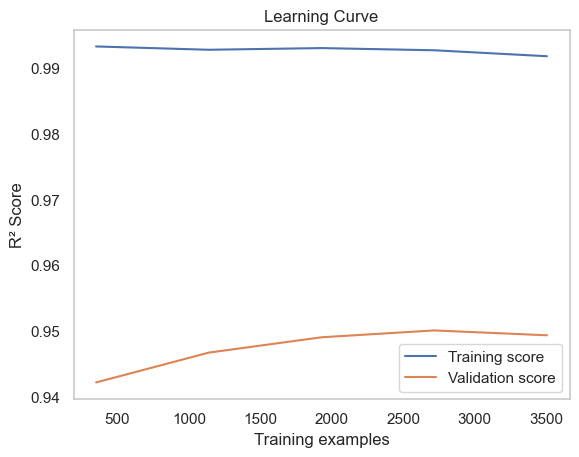

In [37]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    stacked_model, x, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()